In [ ]:
## Information of the task
Understanding the purchasing trends, chip purchasing behaviour of the customer and finding which customer segment is interested more 
Main Goals:
1. checking for missing data, anomalies, outliers and clean them
2. creating charts and graphs and note insights and trends
3. determine which customer segment to be targetted

In [3]:
## importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
%matplotlib inline
import seaborn as sb

In [8]:
## importing our dataset
dt = pd.read_csv('QVI_transaction_data.csv')
dt.head()       #returns 1st 5 rows of the dataset we can check whether our dataset id imported properly

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,YOUNG SINGLES/COUPLES,Mainstream
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,YOUNG FAMILIES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,YOUNG FAMILIES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,OLDER SINGLES/COUPLES,Mainstream


In [9]:
dt.describe()   ## returns mean, std, max & min values and quarter values provides general description

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
##  check for missing values
dt.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           2
PREMIUM_CUSTOMER    2
dtype: int64

In [11]:
print(len(dt))  # returns the total no of rows in the dataset

264836


In [12]:
## to check datatype
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264834 non-null  object 
 9   PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [13]:
## changing date column into datetime format
dt['DATE'] = pd.to_datetime(dt['DATE'])

In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264834 non-null  object        
 9   PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


C:\Users\vetri\AppData\Local\Temp\ipykernel_7788\241190205.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dt.TOT_SALES, kde = True)
C:\Users\vetri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TOT_SALES', ylabel='Density'>

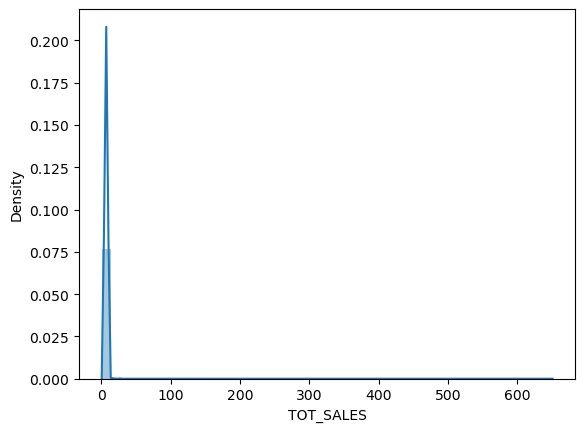

In [15]:
## finding outliers
sb.distplot(dt.TOT_SALES, kde = True)

<Axes: >

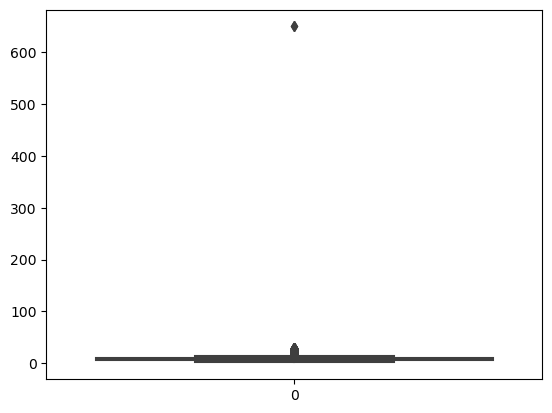

In [16]:
sb.boxplot(dt.TOT_SALES)

In [18]:
nd = dt.select_dtypes(['float', 'int'])
nd.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,1000,1,5,2,6.0
1,1,1307,348,66,3,6.3
2,1,1343,383,61,2,2.9
3,2,2373,974,69,5,15.0
4,2,2426,1038,108,3,13.8


In [ ]:
## Removing outliers

In [19]:
x = nd[nd['TOT_SALES'] < 8.000]

<Axes: >

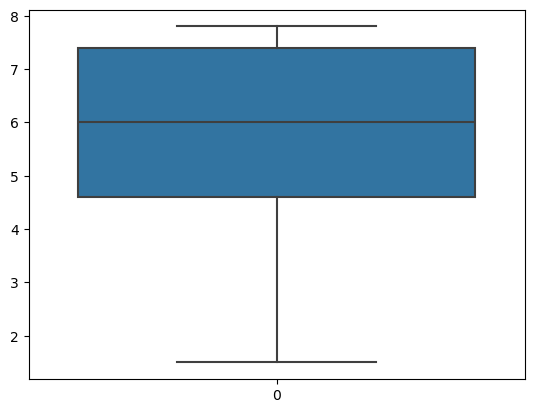

In [22]:
sb.boxplot(x.TOT_SALES)

C:\Users\vetri\AppData\Local\Temp\ipykernel_7788\3005036404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x.TOT_SALES, kde = True)
C:\Users\vetri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TOT_SALES', ylabel='Density'>

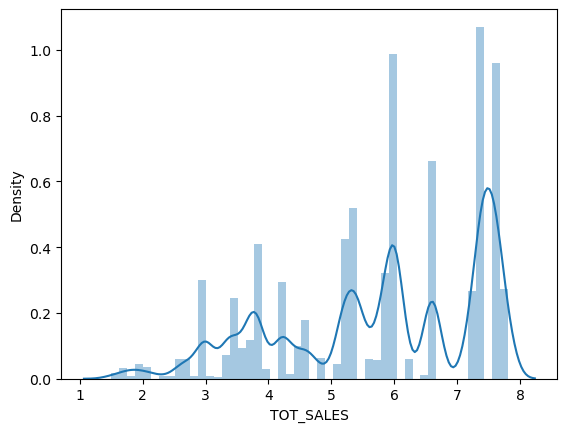

In [23]:
sb.distplot(x.TOT_SALES, kde = True)

1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is 
2. How many customers are in each segment
3. Top selling products

In [30]:
sales = pd.DataFrame(dt.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']))
sales.sort_values(ascending = False, by = 'sum')

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            170377.30  7.356533
RETIREES               Mainstream        156211.30  7.277150
YOUNG SINGLES/COUPLES  Mainstream        151905.60  7.284243
YOUNG FAMILIES         Budget            139775.65  7.309677
OLDER SINGLES/COUPLES  Budget            136032.40  7.390254
                       Mainstream        133568.45  7.291650
                       Premium           129830.45  7.312744
RETIREES               Budget            111022.65  7.303641
OLDER FAMILIES         Mainstream        103575.80  7.271539
RETIREES               Premium            95560.00  7.296885
YOUNG FAMILIES         Mainstream         94466.75  7.319032
MIDAGE SINGLES/COUPLES Mainstream         86220.20  7.261260
YOUNG FAMILIES         Premium            84303.75  7.290820
OLDER FAMILIES         Premium            82054.25  7.332819
YOUNG SINGLES/COUPLES  Budget             66978.60  7.247198
MIDAGE SINGLES/COUPLES Premium            59777.65  7.275761
YOUNG SINGLES/COUPLES  Premium            45707.90  7.277169
MIDAGE SINGLES/COUPLES Budget             36695.60  7.309880
NEW FAMILIES           Budget             21750.35  7.238053
                       Mainstream         16978.95  7.302774
                       Premium            11604.80  7.303210

In [31]:
## Total Sales
sales['sum'].sum()

1934398.4

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

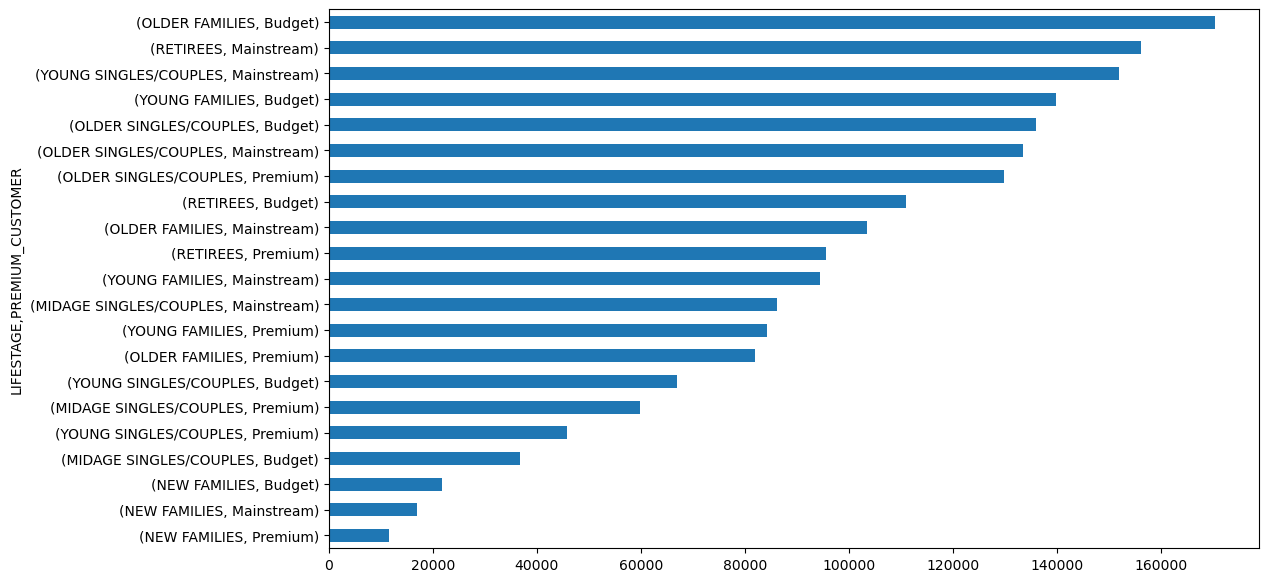

In [34]:
sales['sum'].sort_values().plot.barh(figsize=(12,7))

C:\Users\vetri\AppData\Local\Temp\ipykernel_7788\3271995086.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mp.text(budget_width/2, i, bar1[i], va='center', ha='center', size=8)
C:\Users\vetri\AppData\Local\Temp\ipykernel_7788\3271995086.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mp.text(budget_width + mains_bar[i].get_width()/2, i, bar2[i], va='center', ha='center', size=8)
C:\Users\vetri\AppData\Local\Temp\ipykernel_7788\3271995086.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

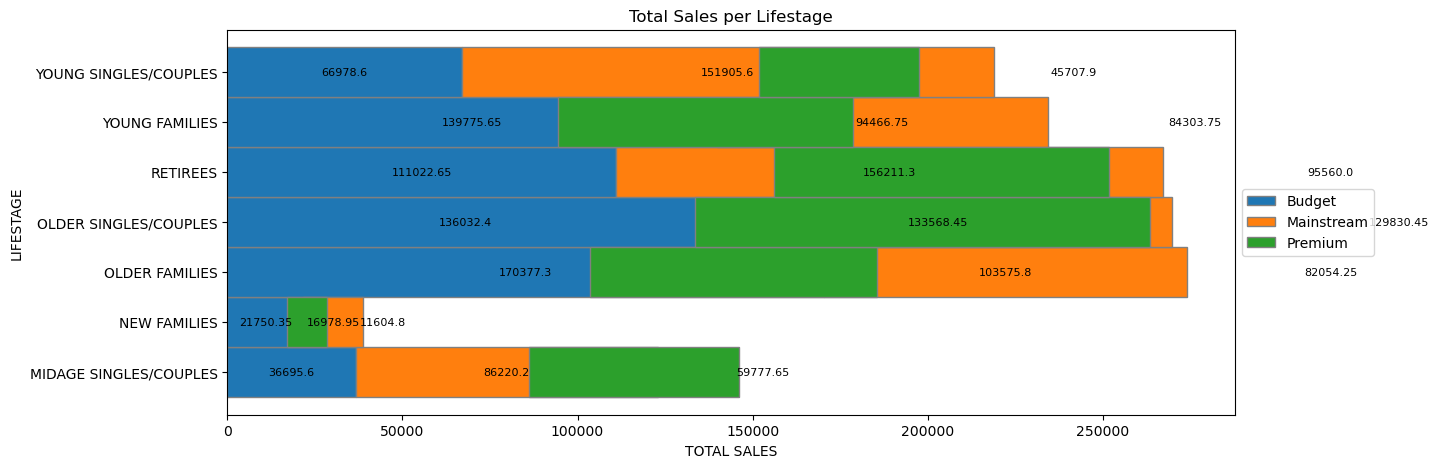

In [39]:
# Values of each group
bar1 = sales[sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bar2 = sales[sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bar3 = sales[sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]
 
# Names of group and bar width
names = sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

mp.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = mp.barh(r, bar1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = mp.barh(r, bar2, left=bar1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
tmp_bar = np.add(bar1, bar2)
prem_bar = mp.barh(r, bar3, left=bar2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    mp.text(budget_width/2, i, bar1[i], va='center', ha='center', size=8)
    mp.text(budget_width + mains_bar[i].get_width()/2, i, bar2[i], va='center', ha='center', size=8)
    mp.text(budget_main_width + prem_bar[i].get_width()/2, i, bar3[i], va='center', ha='center', size=8)
    
# Custom X axis
mp.yticks(r, names)
mp.ylabel("LIFESTAGE")
mp.xlabel("TOTAL SALES")
mp.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

mp.title("Total Sales per Lifestage")

mp.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
mp.show()

In [68]:
t1 = dt.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']) ['TOT_SALES'].sum()
print(t1.sort_values(ascending=False))

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              170377.30
RETIREES                Mainstream          156211.30
YOUNG SINGLES/COUPLES   Mainstream          151905.60
YOUNG FAMILIES          Budget              139775.65
OLDER SINGLES/COUPLES   Budget              136032.40
                        Mainstream          133568.45
                        Premium             129830.45
RETIREES                Budget              111022.65
OLDER FAMILIES          Mainstream          103575.80
RETIREES                Premium              95560.00
YOUNG FAMILIES          Mainstream           94466.75
MIDAGE SINGLES/COUPLES  Mainstream           86220.20
YOUNG FAMILIES          Premium              84303.75
OLDER FAMILIES          Premium              82054.25
YOUNG SINGLES/COUPLES   Budget               66978.60
MIDAGE SINGLES/COUPLES  Premium              59777.65
YOUNG SINGLES/COUPLES   Premium              45707.90
MIDAGE SINGLES/COUPLES  Budget           

The top 3 total sales contributors are :

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              170377.30
RETIREES                Mainstream          156211.30
YOUNG SINGLES/COUPLES   Mainstream          151905.60


In [98]:
productsales = pd.DataFrame(dt.groupby(['PROD_NAME', 'TOT_SALES'])['TOT_SALES'].agg(['sum']))
productsales.sort_values(ascending = False, by = 'sum')

,,sum
PROD_NAME,TOT_SALES,
Dorito Corn Chp Supreme 380g,13.0,37102.0
Smiths Crnkle Chip Orgnl Big Bag 380g,11.8,33901.4
Smiths Crinkle Chips Salt & Vinegar 330g,11.4,32809.2
Kettle Mozzarella Basil & Pesto 175g,10.8,32443.2
Smiths Crinkle Original 330g,11.4,32398.8
...,...,...
Smiths Crinkle Cut Snag&Sauce 150g,7.8,7.8
Snbts Whlgrn Crisps Cheddr&Mstrd 90g,6.8,6.8
CCs Tasty Cheese 175g,6.3,6.3


In [102]:
sales_agg = dt.groupby("PROD_NAME")["TOT_SALES"].agg(pd.Series.mode).sort_values()
print("Top contributor per Product name by Total sales")
print(sales_agg.sort_values(ascending=False))

Top contributor per Product name by Total sales
PROD_NAME
Dorito Corn Chp     Supreme 380g            13.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      11.8
Smiths Crinkle      Original 330g           11.4
Cheezels Cheese 330g                        11.4
Smiths Crinkle Chips Salt & Vinegar 330g    11.4
                                            ... 
Snbts Whlgrn Crisps Cheddr&Mstrd 90g         3.4
Sunbites Whlegrn    Crisps Frch/Onin 90g     3.4
WW Crinkle Cut      Chicken 175g             3.4
Woolworths Medium   Salsa 300g               3.0
Woolworths Mild     Salsa 300g               3.0
Name: TOT_SALES, Length: 114, dtype: float64


The Top 5 highest selling products along with sales figure are
PROD_NAME                                TOT_SALES
Dorito Corn Chp     Supreme 380g            13.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      11.8
Smiths Crinkle      Original 330g           11.4
Cheezels Cheese 330g                        11.4
Smiths Crinkle Chips Salt & Vinegar 330g    11.4


In [104]:
(dt.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / dt.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              4.611763
                        Premium             4.392109
                        Mainstream          4.388691
YOUNG FAMILIES          Premium             4.365506
                        Budget              4.322263
                        Mainstream          4.312905
OLDER SINGLES/COUPLES   Budget              4.108731
                        Premium             4.065204
                        Mainstream          4.050987
RETIREES                Mainstream          3.948730
MIDAGE SINGLES/COUPLES  Mainstream          3.929353
RETIREES                Budget              3.901023
                        Premium             3.844561
MIDAGE SINGLES/COUPLES  Budget              3.800712
                        Premium             3.788848
YOUNG SINGLES/COUPLES   Mainstream          3.663060
NEW FAMILIES            Premium             3.493135
YOUNG SINGLES/COUPLES   Budget              3.426505
NEW F

Product quantity based on life stage

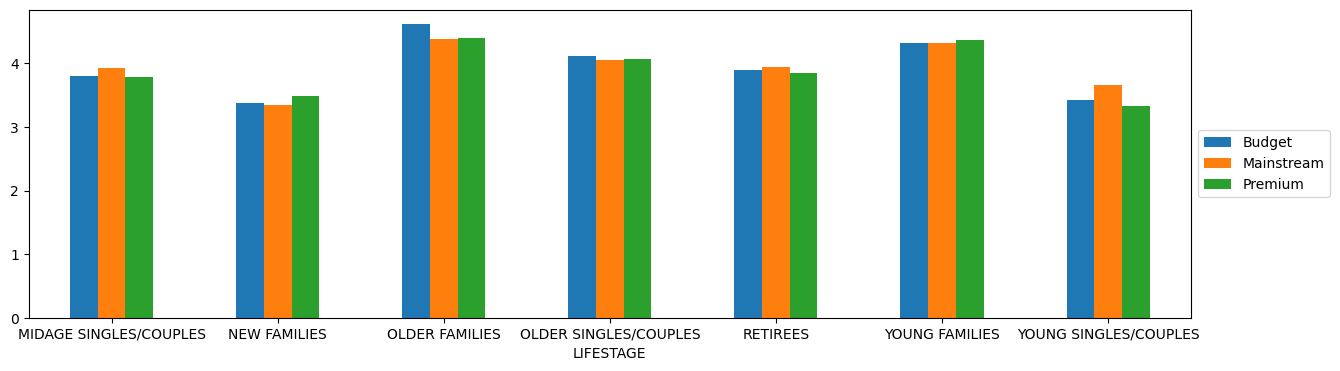

In [105]:
(dt.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / dt.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
mp.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
mp.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

#Trends and Insights : 

The top 3 total sales contributors are :

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              170377.30
RETIREES                Mainstream          156211.30
YOUNG SINGLES/COUPLES   Mainstream          151905.60

The Top 5 highest selling products along with sales figure are
PROD_NAME                                TOT_SALES
Dorito Corn Chp     Supreme 380g            13.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      11.8
Smiths Crinkle      Original 330g           11.4
Cheezels Cheese 330g                        11.4
Smiths Crinkle Chips Salt & Vinegar 330g    11.4


#Views and Recommendations:

Older Families: Focus on the Budget segment. Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase. Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.

Young Singles/Couples: Focus on the Mainstream segment. This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment. Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.

Retirees: Focus on the Mainstream segment. Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.

General: All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size. When promoting chips in general to all segments it is good to take advantage of these two points.